In [1]:
import pandas as pd
import indexer

df = pd.DataFrame(
    dict(
        label=['a', 'b', 'c', 'd'],
        tmin=[1, 4, 30, 29],
        tmax=[1.2, 6, 31, 32]
    )
)
display(df)

dyidx = indexer.DynamicIndex1D()
dyidx.append_index_data(label=df.label, xmin=df.tmin, xmax=df.tmax)

label  tmin  tmax
0     a     1   1.2
1     b     4   6.0
2     c    30  31.0
3     d    29  32.0

In [2]:
dyidx.query_1d_span(0, 2)

['a']

In [3]:
dyidx.query_1d_span(5, 5.5)


['b']

In [4]:
dyidx.query_1d_span(28, 31)


['c', 'd']

In [5]:
dyidx.query_nearest(7)


['b']

In [6]:
# indexer.Interspan1D
df1 = pd.DataFrame(
    dict(
        label=['1a', '1b', '1c', '1d'],
        tmin= [1,    4,    30,   29],
        tmax= [1.2,  6,    31,   32]
    )
)

df2 = pd.DataFrame(
    dict(
        label=['2a', '2b', '2c', '2d'],
        tmin= [1.1,  7,    31,   29],
        tmax= [1.2,  8,    31.1, 32]
    )
)
display(df1)
display(df2)


label  tmin  tmax
0    1a     1   1.2
1    1b     4   6.0
2    1c    30  31.0
3    1d    29  32.0

label  tmin  tmax
0    2a   1.1   1.2
1    2b   7.0   8.0
2    2c  31.0  31.1
3    2d  29.0  32.0

In [7]:
its1D = indexer.Interspan1D()
its1D.add_source('df1', df1.label, df1.tmin, df1.tmax)
its1D.add_source('df2', df2.label, df2.tmin, df2.tmax)
its1D.connected()

[{'df1': {'1a'}, 'df2': {'2a'}},
 {'df1': {'1b'}},
 {'df1': {'1c', '1d'}, 'df2': {'2c', '2d'}},
 {'df2': {'2b'}}]

# glassfire.Cluster API example and result visualization
Gaussian Classifier -> Glassfire

Count of total rows: 165000


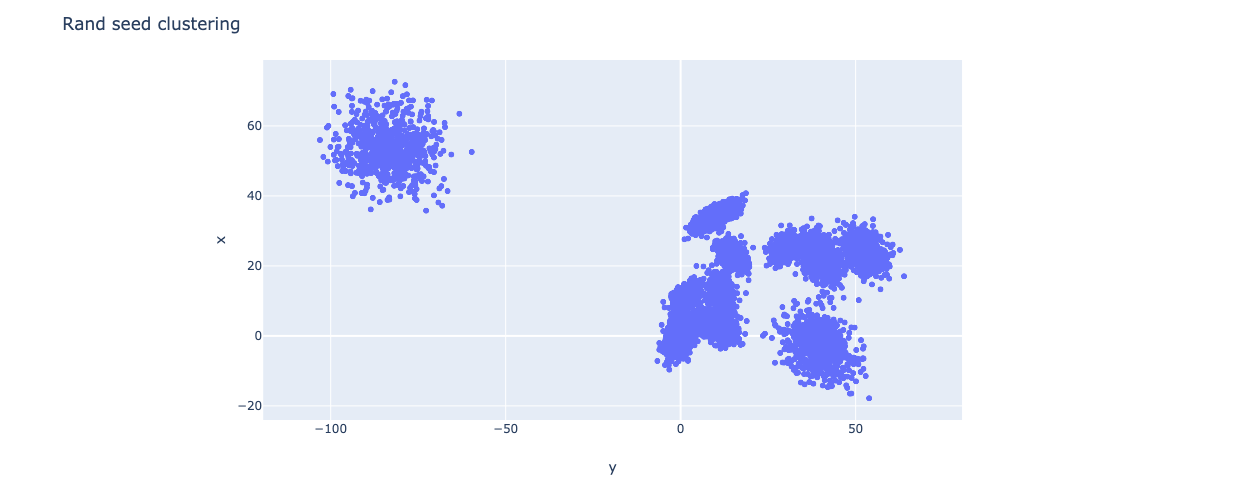

--- Cluster run time 0.5624880790710449 seconds ---


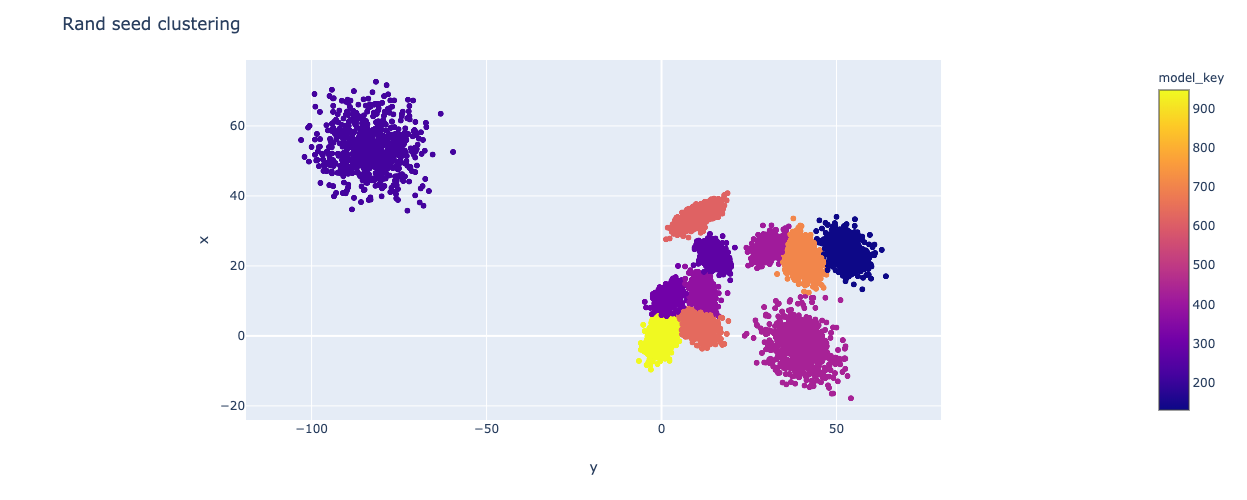

In [2]:
import glassfire
import numpy as np
import pandas as pd
import plotly.express as px

df = pd.read_csv('../testing_data/test.csv')
df.columns = ['idx', 'x', 'y']
print('Count of total rows:', len(df))
dftmp = df.sample(frac=0.05)
dftmp.columns = ['idx', 'x', 'y']

fig = px.scatter(dftmp, x="y", y="x")
fig.update_layout(
    width = 800,
    height = 500,
    title = "Rand seed clustering",
    xaxis = dict(constrain = 'domain'), 
    yaxis = dict(scaleanchor = "x"),
)
fig.show()

import hashlib
def myhash(s):
    return int(hashlib.sha1(s.encode('utf8')).hexdigest(), 16) % (10 ** 3)

import time
start_time = time.time()
cluster = glassfire.Cluster(input=[df['x'], df['y']], info=[], loading_type='col')
cluster.run(10, False)

print("--- Cluster run time %s seconds ---" % (time.time() - start_time))

dftmp['model_key'] = dftmp.apply(lambda x: myhash(cluster.query_model([x.x, x.y], 1)[2].model_key()), axis=1)

fig = px.scatter(dftmp, x="y", y="x", color='model_key')
fig.update_layout(
    width = 800,
    height = 500,
    title = "Rand seed clustering",
    xaxis = dict(constrain = 'domain'), 
    yaxis = dict(scaleanchor = "x")
)
fig.show()